# Exercise 2-1: Classical iTEBD for 2d Ising model
2023, March, Tsuyoshi Okubo

This code simulate 2d Ising model on the square lattice, whose Hamiltonian is given by
 $$ \mathcal{H} = -J \sum_{\langle i,j\rangle} S_i S_j$$
where $S_i = \pm 1$. 

We will calculate the free energy density, $f$, of the system based on infinite Time Evolving Block Decimation (iTEBD) described in R. Orus and G. Vidal Phys. Rev. B 78, 155117 (2008).

The implementation of the algorithm is taken github repository https://github.com/TsuyoshiOkubo/classical_iTEBD

Here we calculate free energy density 
* energy density: $E = f - T \frac{d f}{d T}$
* specific heat: $C = \frac{d E}{d T} = -T\frac{d^2 f}{d T^2}$

We also calculate the magnetization and the correlation length. Note that for infinite system, the magnetization can be finite for $ T < T_c$, and at $T_c$ the correlation length diverges.

#### Parameters for iTEBD simulations
* chi_max: the maxmum bond dimenison in iMPS.
* max_itr: the maxumn number of the iteration to calculate the eigenvector for the largest eigenvalue. 
* seed: the seed for random number generator used for preparing the initial iMPS. 

In [1]:
import numpy as np
try:
    import classical_iTEBD_lib
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/classical_iTEBD_lib.py
    import classical_iTEBD_lib

import pickle
import os

%matplotlib inline
from matplotlib import pyplot

In [2]:
Tc = 2.0/np.log(1.0+np.sqrt(2.0)) ## The critical temperature of the Ising model 

T_min = 2.0
T_max = 2.7
T_step = 0.01

chi_max = 4 ## bond dimension for iTEBD
max_itr = 200 ## maxmun number of iteration for iTEBD
seed = 13 ## seed for random number generator used for preparing initial tenors

data_file = "iTEBDdata_ex2-1_chi"+repr(chi_max)+".dat" ## Simulation data will be seved to this file.
### input parameters ###

T_list=np.arange(T_min,T_max,T_step)




In [3]:
def Calculate_EC(T,f):
    T_num = len(T)
    E = np.empty(T_num-2)
    C = np.empty(T_num-2)
    T_cut = np.empty(T_num-2)
    for i in range(0,T_num-2):
        E[i] = f[i+1]-T[i+1] * (f[i+2]-f[i])/(T[i+2]-T[i])
        C[i] = -T[i+1] * (f[i+2]+f[i]-2.0*f[i+1])/(T[i+2]-T[i+1])**2
        T_cut[i] = T[i+1]
    return T_cut,E,C



In [4]:
%%time
free_energy_density = []
mag = []
xi = []
f_ex = []
mag_ex = []
for T in T_list:
    f_temp, mag_temp, xi_temp, f_ex_temp, mag_ex_temp = classical_iTEBD_lib.iTEBD_Square_Ising(T,chi_max,seed=seed,max_itr=max_itr)
    free_energy_density.append(f_temp)
    mag.append(mag_temp)
    xi.append(xi_temp)
    f_ex.append(f_ex_temp)
    mag_ex.append(mag_ex_temp)

## calculation has finised at 45 steps
T, free_energy_density, exact value = 2.0 -2.051585617326955 -2.051585625389835
T, magnetization, exact value = 2.0 -0.9113203665311501 0.911319377877496
## calculate correlation length
T, correlation lenght 2.0 1.5322620807865024
## calculation has finised at 47 steps
T, free_energy_density, exact value = 2.01 -2.0531339726542712 -2.053133982646481
T, magnetization, exact value = 2.01 -0.9079491801051529 0.9079479211094439
## calculate correlation length
T, correlation lenght 2.01 1.580766226473225
## calculation has finised at 49 steps
T, free_energy_density, exact value = 2.0199999999999996 -2.0547193619207316 -2.0547193743179823
T, magnetization, exact value = 2.0199999999999996 -0.9044212116928642 0.9044196043513214
## calculate correlation length
T, correlation lenght 2.0199999999999996 1.63231753895554
## calculation has finised at 51 steps
T, free_energy_density, exact value = 2.0299999999999994 -2.056342603098299 -2.0563426184992815
T, ma

/Users/okubo/Dropbox/Documents/教育研究活動/Projects/ハッカソン/講義資料/Exercise/classical_iTEBD_lib.py:811: RuntimeWarning: invalid value encountered in double_scalars
  return (1-1.0/np.sinh(2/T)**4)**0.125


## calculation has finised at 199 steps
T, free_energy_density, exact value = 2.2699999999999942 -2.1098774792489063 -2.109901458786371
T, magnetization, exact value = 2.2699999999999942 -0.55479817589209 nan
## calculate correlation length
T, correlation lenght 2.2699999999999942 11.828483448703453
## calculation has finised at 199 steps
T, free_energy_density, exact value = 2.279999999999994 -2.1129957695155612 -2.1130447721912278
T, magnetization, exact value = 2.279999999999994 -0.3833201769656378 nan
## calculate correlation length
T, correlation lenght 2.279999999999994 17.16461203185642
## calculation has finised at 199 steps
T, free_energy_density, exact value = 2.289999999999994 -2.1162545370281918 -2.1162926114027214
T, magnetization, exact value = 2.289999999999994 -0.14185645064344526 nan
## calculate correlation length
T, correlation lenght 2.289999999999994 19.253714463277834
## calculation has finised at 199 steps
T, free_energy_density, exact value = 2.2999999999999936 

## calculation has finised at 65 steps
T, free_energy_density, exact value = 2.559999999999988 -2.2252149322911925 -2.2252152569507433
T, magnetization, exact value = 2.559999999999988 -1.9344192511568465e-06 nan
## calculate correlation length
T, correlation lenght 2.559999999999988 3.8050677402292337
## calculation has finised at 63 steps
T, free_energy_density, exact value = 2.569999999999988 -2.229790839998846 -2.229791128069595
T, magnetization, exact value = 2.569999999999988 -1.9174824707591562e-06 nan
## calculate correlation length
T, correlation lenght 2.569999999999988 3.70757364600585
## calculation has finised at 61 steps
T, free_energy_density, exact value = 2.5799999999999876 -2.234395749585737 -2.234396005618458
T, magnetization, exact value = 2.5799999999999876 -1.9559646071494387e-06 nan
## calculate correlation length
T, correlation lenght 2.5799999999999876 3.615593129670069
## calculation has finised at 60 steps
T, free_energy_density, exact value = 2.5899999999999

In [5]:
 ## Caluculate Energy and Specific heat by numerical differentiation
T_cut, E, C = Calculate_EC(T_list, free_energy_density)
T_cut_ex, E_ex, C_ex = Calculate_EC(T_list, f_ex)
    
## save data
f = open(data_file,"wb")
obs_list_all = [free_energy_density, E, C, mag, xi, f_ex, E_ex,C_ex, mag_ex, T_list,T_cut, T_cut_ex]
pickle.dump(obs_list_all,f)
f.close

<function BufferedWriter.close>

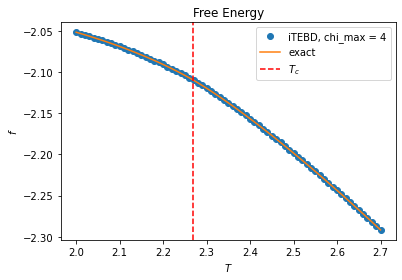

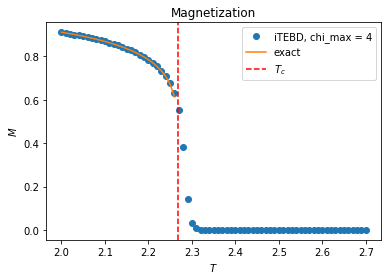

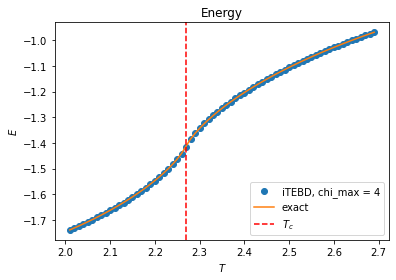

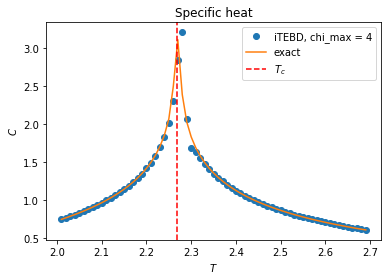

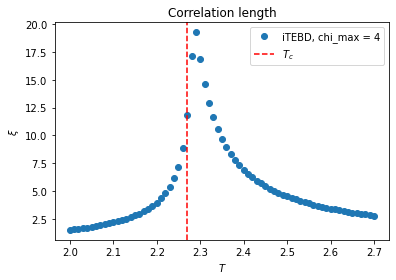

In [6]:
## plot observables
pyplot.figure()
pyplot.title("Free Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$f$")
pyplot.plot(T_list,free_energy_density,"o",label = "iTEBD, chi_max = "+repr(chi_max))
pyplot.plot(T_list,f_ex,"-",label = "exact")
pyplot.axvline([Tc],0,1,  c="red", linestyle='dashed', label="$T_c$") ## position of Tc

pyplot.legend()


pyplot.figure()
pyplot.title("Magnetization")
pyplot.xlabel("$T$")
pyplot.ylabel("$M$")
pyplot.plot(T_list,np.abs(mag),"o",label = "iTEBD, chi_max = "+repr(chi_max))
pyplot.plot(T_list,mag_ex,"-",label = "exact")
pyplot.axvline([Tc],0,1,  c="red", linestyle='dashed', label="$T_c$") ## position of Tc

pyplot.legend()


pyplot.figure()
pyplot.title("Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$E$")

pyplot.plot(T_cut,E,"o",label = "iTEBD, chi_max = "+repr(chi_max))
pyplot.plot(T_cut_ex,E_ex,"-",label = "exact")
pyplot.axvline([Tc],0,1,  c="red", linestyle='dashed', label="$T_c$") ## position of Tc

pyplot.legend()

pyplot.figure()
pyplot.title("Specific heat")
pyplot.xlabel("$T$")
pyplot.ylabel("$C$")
pyplot.plot(T_cut,C,"o",label = "iTEBD, chi_max = "+repr(chi_max))
pyplot.plot(T_cut_ex,C_ex,"-",label = "exact")
pyplot.axvline([Tc],0,1,  c="red", linestyle='dashed', label="$T_c$") ## position of Tc
pyplot.legend()

pyplot.figure()
pyplot.title("Correlation length")
pyplot.xlabel("$T$")
pyplot.ylabel('$\\xi$')
pyplot.plot(T_list,xi,"o",label = "iTEBD, chi_max = "+repr(chi_max))
pyplot.axvline([Tc],0,1,  c="red", linestyle='dashed', label="$T_c$") ## position of Tc
pyplot.legend()
